# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




In [2]:
#import gensim
import nltk
import pandas as pd
import numpy as np
import re
from nltk import FreqDist
#nltk.download('stopwords') # run this one time
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

In [3]:
import os
#os.chdir('C:\\Users\\Administrator\\Desktop\\Data\\reviews_Automotive_5.json')
os.chdir('C:\\Users\\prudi\\Desktop\\Data Sets\\amazon-fine-food-reviews')
#df = pd.read_json('Reviews.json', lines=True)
df=pd.read_csv('Reviews.csv')

In [4]:
df.loc[df['ProductId'] == 'B000HDOPZG',:]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
73779,73780,B000HDOPZG,ANHNUHKI585T7,L. Hirsch,14,14,5,1278374400,Irresistable!,My husband and I just looked at each other aft...
73780,73781,B000HDOPZG,AQFTBJZPVNMAH,Hippo,7,7,4,1254960000,Tasty & Addictive,It is a very tasty treat I enjoy with my after...
73781,73782,B000HDOPZG,A2G2DXPFZKG48W,Audio Maven,6,6,5,1204070400,Great tasting snack,These are the greatest wafer type cookies I ha...
73782,73783,B000HDOPZG,AL1DVFEY7X5VR,Always Snackin',5,5,5,1199923200,Can't eat just one!,ALL I CAN SAY IS OMG!THESE LITTLE TREATS ARE S...
73783,73784,B000HDOPZG,A2F64XFMO5ELL6,Rod B,3,3,4,1260489600,Quadratini Lemon are great!,"My wife loves these little wafers, but our loc..."
73784,73785,B000HDOPZG,A16SDTBEKKFN2Z,M. White,2,2,5,1336521600,delicious,delicious hazel nut taste in a cunchy bite- si...
73785,73786,B000HDOPZG,AI47WBE7PHESF,J. Collins,2,2,5,1278720000,Punch of lemon flavor,These Loacker Quadratini Lemon Wafers are the ...
73786,73787,B000HDOPZG,ALT34F4DUTJ8Z,Sassy08,2,2,5,1278288000,Bet you can't eat just one!,"Previously, these lemon wafer cookies were sol..."
73787,73788,B000HDOPZG,A3BIN78AJ0D4JO,"MrsDiehl ""MrsDiehl""",2,2,5,1272067200,Special treat,I tried this product at a friend's house and h...
73788,73789,B000HDOPZG,AKFGO1HY01B85,L. Botez,2,2,5,1270598400,Yum,I love these cookies! what can I say. They ar...


In [5]:
df.loc[df['ProductId'] == 'B000HDL1RQ',:]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
78433,78434,B000HDL1RQ,ANHNUHKI585T7,L. Hirsch,14,14,5,1278374400,Irresistable!,My husband and I just looked at each other aft...
78434,78435,B000HDL1RQ,AQFTBJZPVNMAH,Hippo,7,7,4,1254960000,Tasty & Addictive,It is a very tasty treat I enjoy with my after...
78435,78436,B000HDL1RQ,A2G2DXPFZKG48W,Audio Maven,6,6,5,1204070400,Great tasting snack,These are the greatest wafer type cookies I ha...
78436,78437,B000HDL1RQ,AL1DVFEY7X5VR,Always Snackin',5,5,5,1199923200,Can't eat just one!,ALL I CAN SAY IS OMG!THESE LITTLE TREATS ARE S...
78437,78438,B000HDL1RQ,A2F64XFMO5ELL6,Rod B,3,3,4,1260489600,Quadratini Lemon are great!,"My wife loves these little wafers, but our loc..."
78438,78439,B000HDL1RQ,A16SDTBEKKFN2Z,M. White,2,2,5,1336521600,delicious,delicious hazel nut taste in a cunchy bite- si...
78439,78440,B000HDL1RQ,AI47WBE7PHESF,J. Collins,2,2,5,1278720000,Punch of lemon flavor,These Loacker Quadratini Lemon Wafers are the ...
78440,78441,B000HDL1RQ,ALT34F4DUTJ8Z,Sassy08,2,2,5,1278288000,Bet you can't eat just one!,"Previously, these lemon wafer cookies were sol..."
78441,78442,B000HDL1RQ,A3BIN78AJ0D4JO,"MrsDiehl ""MrsDiehl""",2,2,5,1272067200,Special treat,I tried this product at a friend's house and h...
78442,78443,B000HDL1RQ,AKFGO1HY01B85,L. Botez,2,2,5,1270598400,Yum,I love these cookies! what can I say. They ar...


In [6]:
#Sorting data according to ProductId in ascending order
sorted_data=df.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [7]:
#Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(393933, 10)

In [8]:
sorted_data[sorted_data.duplicated(['UserId','ProfileName',"Time","Text"])].shape

(174521, 10)

In [9]:
final.shape

(393933, 10)

In [10]:
final=final.reset_index()

In [11]:
final=final.loc[:5,:]

In [12]:
def partition(x):
    if x < 3:
        return 0
    return 1

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = final['Score']
positiveNegative = actualScore.map(partition) 
final['Score'] = positiveNegative
print("Number of data points in our data", final.shape)
final.head(3)

Number of data points in our data (6, 11)


,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,1,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...
1,150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
2,150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."


In [13]:
from nltk.corpus import stopwords
Stopwords=stopwords.words('english')

In [14]:
import nltk
for i in range(len(final['Text'])):
    words=nltk.word_tokenize(final['Text'][i])
    withoutstopwords=[word for word in words if word not in Stopwords]
    final['Text'][i]=' '.join(withoutstopwords)

C:\Users\prudi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
## Remove the special characters
final['Text'] = final['Text'].str.replace("[^a-zA-Z0-9]+", " ")

In [16]:
# remove urls from text python: https://stackoverflow.com/a/40823105/4084039
## Remove the URL'S
import re
final['Text']=final['Text'].apply(lambda x: re.sub(r"http\S+", "", x))

In [17]:
from nltk.stem import PorterStemmer
Stemmer=PorterStemmer()
for i in range(len(final['Text'])):
    tokens=nltk.word_tokenize(final['Text'][i])
    stem_tokens=[Stemmer.stem(token) for token in tokens]
    final['Text'][i]=' '.join(stem_tokens)

C:\Users\prudi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
# https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element
## Remove xml tags from the reviews
from bs4 import BeautifulSoup
final['Text']=final['Text'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

In [19]:
# remove short words (length < 3)
final['Text'] = final['Text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [20]:
# make entire text lowercase
final['Text'] = [r.lower() for r in final['Text']]

In [21]:
final.head(1)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,1,1108425600,"Nice cadence, catchy rhymes",june saw charm group rose begin droop pep chic...


In [27]:
# printing some random reviews
sent_0 = final['Text'].values[0]
print(sent_0)
print("="*50)

sent_1000 = final['Text'].values[10]
print(sent_1000)
print("="*50)

sent_1500 = final['Text'].values[20]
print(sent_1500)
print("="*50)

sent_4900 = final['Text'].values[30]
print(sent_4900)
print("="*50)

june saw charm group rose begin droop pep chicken soup sprinkl sprinkl twice sprinkl chicken soup rice thi great book teach children month year the repetit phrase funni littl stori accompani pictur make ideal bedtim read thi nearli good sendak book like where wild thing pierr the boy who didn care still carri uniqu brand charm


IndexError: index 10 is out of bounds for axis 0 with size 6

In [22]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [23]:
final['Text']=final['Text'].map(decontracted)

In [24]:
#remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
final['Text']=final['Text'].apply(lambda x: re.sub("\S*\d\S*", "", x))

In [25]:
final.head(2)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,1,1108425600,"Nice cadence, catchy rhymes",june saw charm group rose begin droop pep chic...
1,150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,thi fun way children learn month year learn po...


In [26]:
#remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
import re
sent_0 = re.sub("\S*\d\S*", "", "This are number 123")
print(sent_0)

This are number 


In [27]:
final.head(1)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,1,1108425600,"Nice cadence, catchy rhymes",june saw charm group rose begin droop pep chic...


In [28]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in Stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 1503.60it/s]


In [29]:
final['Text']=preprocessed_reviews

In [ ]:
## Additional code snippets to introduce you to the new

In [401]:
# Each word in the lexicon has scores for:
# 1)     polarity: negative vs. positive    (-1.0 => +1.0)
# 2) subjectivity: objective vs. subjective (+0.0 => +1.0)
# 3)    intensity: modifies next word?      (x0.5 => x2.0)
from textblob import TextBlob
text_1=TextBlob(df['Text'][10])
text_1.sentiment

Sentiment(polarity=0.20859375, subjectivity=0.6824776785714286)

In [402]:
# Spelling correction
from textblob import Word
w = Word('topped')
w.spellcheck()

[('topped', 1.0)]

In [403]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

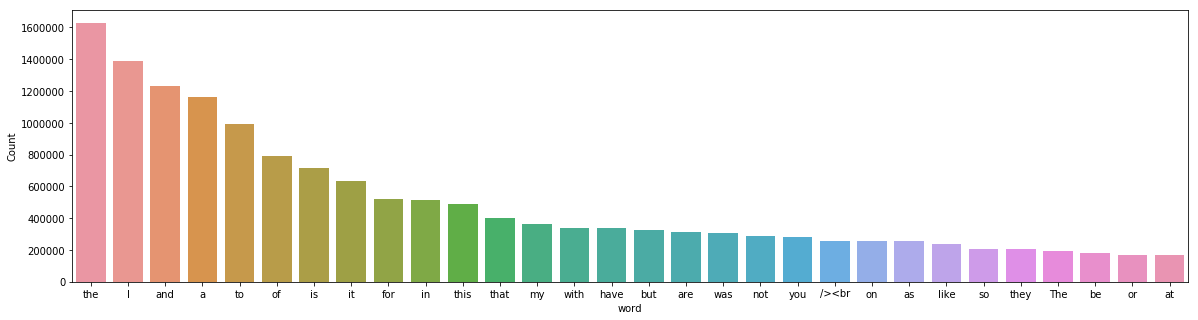

In [404]:
freq_words(df['Text'])

<h2><font color='red'>[3.2] Preprocessing Review Summary</font></h2>

In [405]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."


In [406]:
## Similartly you can do preprocessing for review summary also.

# [4] Featurization

## [4.1] BAG OF WORDS

In [30]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

In [35]:
all_words=' '.join(x for x in final['Text'])
all_words=all_words.split()
fdist = FreqDist(all_words)
for f in fdist:
    fdist[f]=0
fdist_actual=fdist.copy()

BOW=[]

In [36]:
fdist

FreqDist({'june': 0, 'saw': 0, 'charm': 0, 'group': 0, 'rose': 0, 'begin': 0, 'droop': 0, 'pep': 0, 'chicken': 0, 'soup': 0, ...})

In [37]:
BOW=[]
for x in final['Text']:
    fdist_actual=fdist.copy()
    words=nltk.word_tokenize(x)
    for w in words:
        if w in fdist_actual.keys():
            fdist_actual[w]=1
    BOW.append(fdist_actual)
BOW_final=pd.DataFrame(BOW)

In [38]:
BOW_final.head(2)

,accompani,actual,along,bedtim,begin,bigger,book,boy,brand,care,...,track,twice,two,uniqu,version,watch,way,whole,wild,year
0,1,0,0,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [39]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(BOW_final, final['Score'],test_size=0.3,random_state=42)

In [40]:
print('Shape of X_train is',X_train.shape)
print('Shape of y_train is',y_train.shape)

print('*'*100)

print('Shape of X_test is',X_test.shape)
print('Shape of y_test is',y_test.shape)

Shape of X_train is (4, 113)
Shape of y_train is (4,)
****************************************************************************************************
Shape of X_test is (2, 113)
Shape of y_test is (2,)


In [41]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [42]:
## Predicting the values for the X_test
predicted_xtest=list(neigh.predict(X_test))
actual_test=list(y_test)

In [43]:
## Predicting the values for the X_train
predicted_xtrain=list(neigh.predict(X_train))
actual_train=list(y_train)

In [44]:
## Passing the first value from the X_train
Predicted_value_X_train=neigh.predict(X_train.iloc[:1,:])
print('Predicted value for the first record is ',Predicted_value_X_train)

Predicted value for the first record is  [1]


In [45]:
## Passing the first value from the X_test
Predicted_value_X_test=neigh.predict(X_test.iloc[:1,:])
print('Predicted value for the first record is ',Predicted_value_X_test)

Predicted value for the first record is  [1]


In [46]:
## Passing the first value from the X_test and Predicting the Probelities
Predicted_value_X_test=neigh.predict_proba(X_test.iloc[1:20,:])
print('Predicted value for the first record is \n',Predicted_value_X_test)

Predicted value for the first record is 
 [[1.]]


In [47]:
neigh.kneighbors(X_train.iloc[:1,:],return_distance=True)

(array([[0.        , 5.19615242, 5.56776436]]),
 array([[0, 2, 3]], dtype=int64))

In [420]:
neigh.kneighbors(X_train.iloc[:1,:],return_distance=False)

array([[  0, 522, 158]], dtype=int64)

In [421]:
print('Classes we have to predict ',neigh.classes_)

Classes we have to predict  [0 1]


In [422]:
# Confusion metrics for the Test data

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results =confusion_matrix(actual_test, predicted_xtest) 

print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual_test, predicted_xtest) )
print('Report : ')
print (classification_report(actual_test, predicted_xtest) )


Confusion Matrix :
[[  6  29]
 [  6 260]]
Accuracy Score : 0.8837209302325582
Report : 
              precision    recall  f1-score   support

           0       0.50      0.17      0.26        35
           1       0.90      0.98      0.94       266

   micro avg       0.88      0.88      0.88       301
   macro avg       0.70      0.57      0.60       301
weighted avg       0.85      0.88      0.86       301



In [423]:
# Confusion metrics for the Test data

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results =confusion_matrix(actual_train, predicted_xtrain) 

print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual_train, predicted_xtrain) )
print('Report : ')
print (classification_report(actual_train, predicted_xtrain) )

Confusion Matrix :
[[ 55  69]
 [ 10 566]]
Accuracy Score : 0.8871428571428571
Report : 
              precision    recall  f1-score   support

           0       0.85      0.44      0.58       124
           1       0.89      0.98      0.93       576

   micro avg       0.89      0.89      0.89       700
   macro avg       0.87      0.71      0.76       700
weighted avg       0.88      0.89      0.87       700



In [424]:
## Building KNN Model using BOW as the input parameter

## [4.2] COUNT VECTORIZER

class sklearn.feature_extraction.text.CountVectorizer(input=’content’, encoding=’utf-8’, decode_error=’strict’, strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern=’(?u)\b\w\w+\b’, ngram_range=(1, 1), analyzer=’word’, max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class ‘numpy.int64’>)[source]¶

In [425]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_df=0.95, min_df=2, max_features=None, stop_words='english',lowercase=True)
count_vect.fit(final['Text'])
final_counts = count_vect.transform(final['Text'])
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (1001, 2529)
the number of unique words  2529


In [426]:
count_vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [427]:
final_counts.toarray()[10]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [428]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 20

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['Text'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(df['Text'])
tf_feature_names = tf_vectorizer.get_feature_names()

print('Top columns \n',tf_feature_names)

pd.DataFrame(tf.toarray(),columns=tf_feature_names)

Top columns 
 ['amazon', 'br', 'buy', 'coffee', 'don', 'flavor', 'food', 'good', 'great', 'just', 'like', 'little', 'love', 'product', 'really', 'taste', 'tea', 'time', 'use', 've']


,amazon,br,buy,coffee,don,flavor,food,good,great,just,like,little,love,product,really,taste,tea,time,use,ve
0,0,0,0,0,0,0,1,1,0,0,1,0,0,2,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0


In [429]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 20

# Run NMF
#nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


In [430]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ('Topic %d:' % (topic_idx))
        print (" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
#display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
really don like good ve just taste br great flavor
Topic 1:
time don ve like good just br great product love
Topic 2:
great don ve good like love taste just product flavor
Topic 3:
buy don ve like good just br great taste product
Topic 4:
br don ve like just good taste product flavor great
Topic 5:
little don like ve just good br taste great love
Topic 6:
use don ve like good just br product great taste
Topic 7:
good ve don just br taste flavor great product love
Topic 8:
food don ve like br just good love product great
Topic 9:
just don like ve good br taste love great flavor
Topic 10:
flavor don like ve good just taste br great love
Topic 11:
tea don ve like taste flavor good br just love
Topic 12:
like good don taste just br flavor really product great
Topic 13:
coffee don like ve good taste flavor just br love
Topic 14:
product don ve like good br just amazon great taste
Topic 15:
amazon don ve product br good like just great love
Topic 16:
love don ve like just good great

In [431]:
for topic_id,topic in enumerate(lda.components_):
    print(topic_id)
    print(topic.argsort())

0
[16  3  6  2 18  0 17 11 12 13  5  8  1 15  9 19  7 10  4 14]
1
[16  3  6  2 18 11 14  5  0 15 12 13  8  1  9  7 10 19  4 17]
2
[16  6  3  2 11 18 17 14  0  1  5 13  9 15 12 10  7 19  4  8]
3
[16  3  6 18 11 14 17  5 12  0 13 15  8  1  9  7 10 19  4  2]
4
[16  3  2  6 18 11  0 12 14 17  8  5 13 15  7  9 10 19  4  1]
5
[16  3  0  6  2 18 17 14 13  5 12  8 15  1  7  9 19 10  4 11]
6
[16  6  3  2  0 14 11 17  5 12 15  8 13  1  9  7 10 19  4 18]
7
[16  6  3  2 18 10 11 17  0 14 12 13  8  5 15  1  9  4 19  7]
8
[ 3 16  5 18 15  2  0 11 14 17  8 13 12  7  9  1 10 19  4  6]
9
[16  3  6  2  0 18 17 11 14 13  5  8 12 15  1  7 19 10  4  9]
10
[ 6 16  2  0 18 17  3 11 13 14 12  8  1 15  9  7 19 10  4  5]
11
[ 6  3  2 11 13 18  0 17 14  8 12  9  1  7  5 15 10 19  4 16]
12
[19 16  3  6  2  0 18 17 12 11  8 13 14  5  1  9 15  4  7 10]
13
[ 6 16 11  2 17 14 13 18  0  8 12  1  9  5 15  7 19 10  4  3]
14
[16  3  6 11  2 14 17  5 18 12 15  8  0  9  1  7 10 19  4 13]
15
[16  3 11 18  6 14  5 17  2 15 1